# Лабораторная работа №5: Обучение на основе временны’х различий

## Задание:
На основе рассмотренного на лекции примера реализуйте следующие алгоритмы:

- SARSA
- Q-обучение
- Двойное Q-обучение

для любой среды обучения с подкреплением (кроме рассмотренной на лекции среды Toy Text / Frozen Lake) из библиотеки Gym (или аналогичной библиотеки).

100%|███████████████████████████████████| 20000/20000 [00:02<00:00, 6925.43it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ -13.25173696  -12.39605989  -14.11623231  -13.25136681]
 [ -12.5580069   -11.62013456  -13.2919406   -13.55456177]
 [ -11.69320238  -10.84054371  -12.64144122  -12.60778355]
 [ -10.89023458  -10.04936099  -11.78937143  -11.88847835]
 [ -10.15532438   -9.22701619  -11.10834298  -11.07496311]
 [  -9.26565819   -8.37592232  -10.13306003  -10.27620006]
 [  -8.380709     -7.5113468    -9.58319642   -9.53399545]
 [  -7.535188     -6.62410798   -8.56319484   -8.61688964]
 [  -6.64941925   -5.72206402   -8.31299248   -7.81793856]
 [  -5.74459465   -4.81122249   -5.24027371   -6.85260578]
 [  -4.85755447   -3.90127971   -4.33264622   -6.00426343]
 [  -3.93743148   -3.91822446   -3.00919637   -5.04552495]
 [ -13.1609511   -13.90915597  -14.86164694  -13.98546187]
 [ -12.44870221  -16.60849789  -24.99495609  -17.78441873]
 [ -11.73565197  -16.42963026  -20.72688677  -18.7202329 ]
 [ -10.8836935   -16.49689852  -30.1364691   -16.9689756 ]
 [ -10.2299048   -1

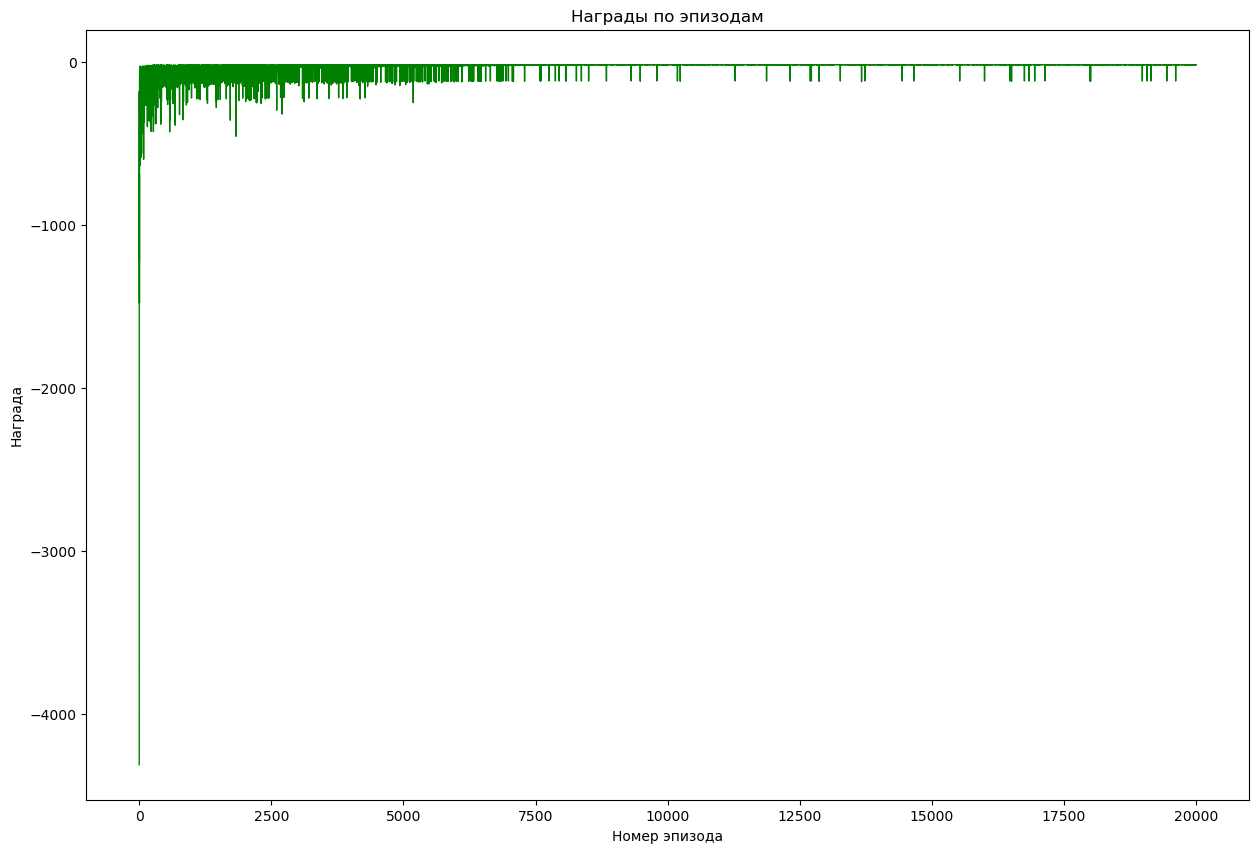

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from tqdm import tqdm

# ************************************ БАЗОВЫЙ АГЕНТ *****************************************

class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''

    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []


    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)


    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
            # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])


    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:

            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)


    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()


    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass

# ************************************ SARSA *****************************************

class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Выбор действия
            action = self.make_action(state)

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Выполняем следующее действие
                next_action = self.make_action(next_state)

                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

# ************************************ Q-обучение *****************************************

class QLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Правило обновления Q для SARSA (для сравнения)
                # self.Q[state][action] = self.Q[state][action] + self.lr * \
                #     (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Правило обновления для Q-обучения
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * np.max(self.Q[next_state]) - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

# ************************************ Двойное Q-обучение *****************************************

class DoubleQLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Double Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Двойное Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Вторая матрица
        self.Q2 = np.zeros((self.nS, self.nA))
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        temp_q = self.Q[state] + self.Q2[state]
        return np.argmax(temp_q)


    def print_q(self):
        print('Вывод Q-матриц для алгоритма ', self.ALGO_NAME)
        print('Q1')
        print(self.Q)
        print('Q2')
        print(self.Q2)


    def learn(self):
        '''
        Обучение на основе алгоритма Double Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    # Обновление первой таблицы
                    self.Q[state][action] = self.Q[state][action] + self.lr * \
                        (rew + self.gamma * self.Q2[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                else:
                    # Обновление второй таблицы
                    self.Q2[state][action] = self.Q2[state][action] + self.lr * \
                        (rew + self.gamma * self.Q[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)


def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('CliffWalking-v0', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


def run_sarsa():
    env = gym.make('CliffWalking-v0')
    agent = SARSA_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = QLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def run_double_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = DoubleQLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def main():
    run_sarsa()


if __name__ == '__main__':
    main()

100%|███████████████████████████████████| 20000/20000 [00:03<00:00, 5984.23it/s]


Вывод Q-матрицы для алгоритма  Q-обучение
[[ -12.43482348  -12.30962461  -12.30887957  -12.40687036]
 [ -11.8328893   -11.54854076  -11.54852367  -12.46654886]
 [ -11.25071315  -10.76414645  -10.76414772  -11.94980249]
 [ -10.67447145   -9.96343      -9.96342987  -11.45824971]
 [  -9.94838775   -9.14635938   -9.14635936  -10.74631663]
 [  -9.12667664   -8.31261185   -8.31261185   -9.93345333]
 [  -8.2783984    -7.46184887   -7.46184887   -9.12484228]
 [  -7.44169269   -6.59372334   -6.59372334   -8.30661175]
 [  -6.57984565   -5.70788096   -5.70788096   -7.45900362]
 [  -5.69977421   -4.80396016   -4.80396016   -6.56353153]
 [  -4.79847642   -3.881592     -3.881592     -5.67819343]
 [  -3.86793198   -3.85994091   -2.9404       -4.79859761]
 [ -13.05425142  -11.54888054  -11.54888054  -12.31778539]
 [ -12.31655313  -10.76416381  -10.76416381  -12.31790206]
 [ -11.5488065    -9.96343246   -9.96343246  -11.5488803 ]
 [ -10.76415199   -9.14635966   -9.14635966  -10.7641638 ]
 [  -9.9634308

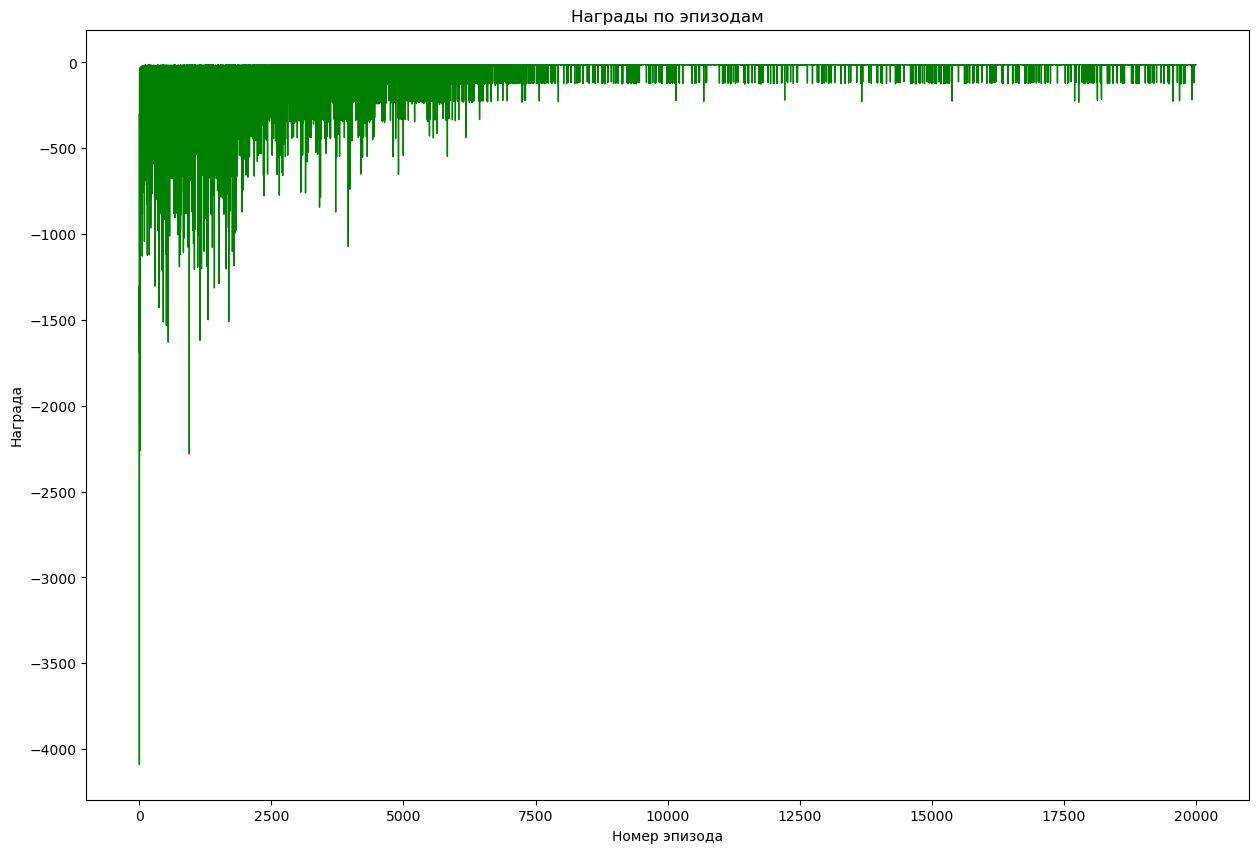

In [ ]:
run_q_learning()

100%|███████████████████████████████████| 20000/20000 [00:03<00:00, 5645.08it/s]


Вывод Q-матриц для алгоритма  Двойное Q-обучение
Q1
[[ -13.41085121  -12.32039715  -13.22085441  -13.46495809]
 [ -12.54291913  -12.47561857  -11.54889273  -13.40871041]
 [ -12.22432693  -11.86887411  -10.77165602  -12.40171682]
 [ -11.16322267  -10.82534065   -9.96365824  -12.05249325]
 [ -11.05205443  -10.41639727   -9.1492258   -10.94800023]
 [  -9.52649573  -10.21246777   -8.3446886   -10.28149595]
 [  -9.80824246   -8.2362672    -7.47375959   -8.94535926]
 [  -7.20712046   -6.77046104   -8.92376595   -8.28890266]
 [  -6.54453082   -5.91904761   -5.69441497   -6.60453439]
 [  -4.55872983   -4.86585995   -4.80428923   -6.22828448]
 [  -4.00220499   -4.0351628    -3.86762016   -4.91395969]
 [  -3.05974744   -3.83402984   -2.94038794   -3.72068814]
 [ -13.09663389  -11.56363323  -11.54888054  -12.32233877]
 [ -12.32489122  -10.76693189  -10.76416381  -12.32127054]
 [ -11.67875891   -9.96343246   -9.98199815  -11.55600029]
 [ -10.76491544   -9.1463998    -9.14635966  -10.76571002]
 [ -

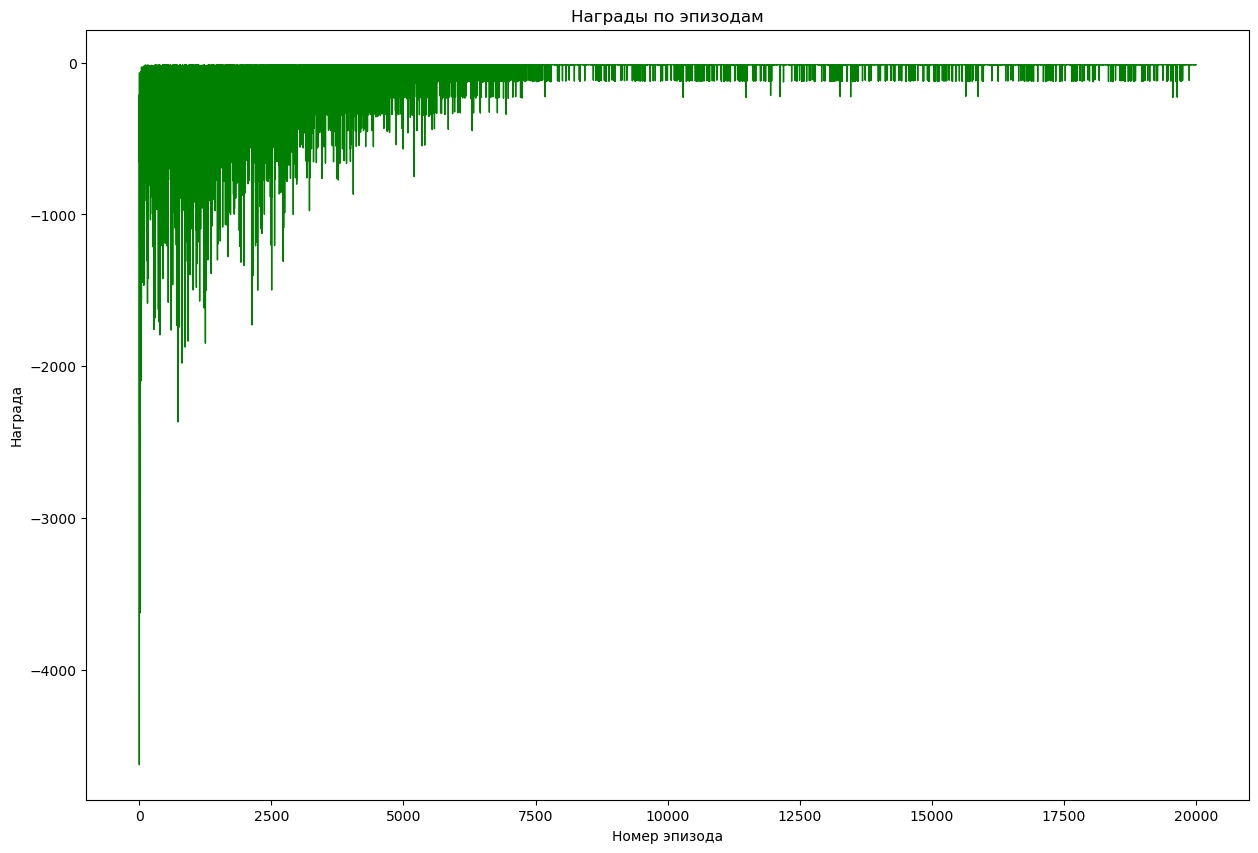

In [ ]:
run_double_q_learning()